# Importing the data and getting to know our data

In [1]:
#importing necessary librarys for stroke prediction dataset
import numpy as np 
import pandas as pd 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA



from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#reading csv file
df = pd.read_csv('C:/Users/USER/Desktop/healthcare-dataset-stroke-data.csv')

df.describe()
#creating a copy of dataframe
df_copied = df.copy(deep=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Preliminery data exploration 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


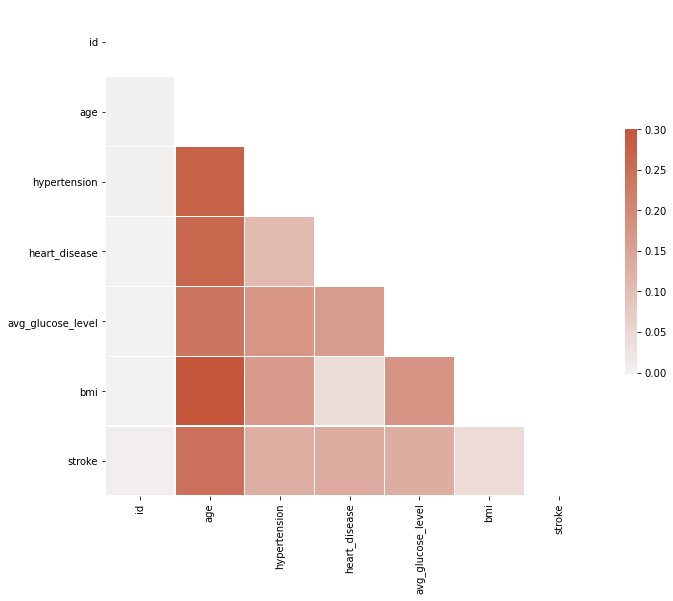

In [2]:
# computing the correlation matrix

corr = df.corr()

# generating mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# seting up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generating custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#drawing the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})
df.head()

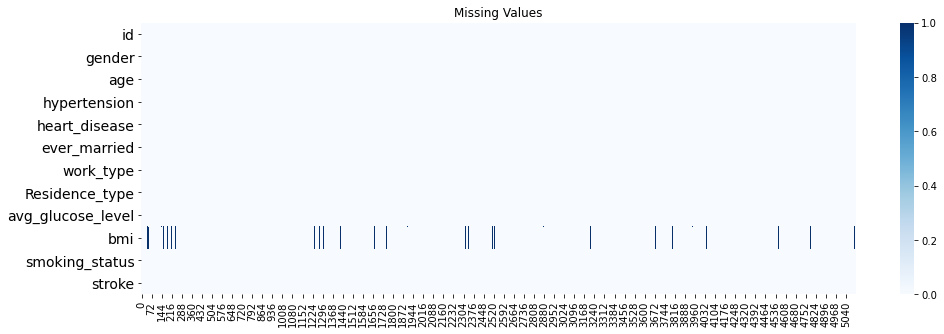

In [3]:
#Showing Missing values in data
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

#using heatmap function to plot out data,and transpose function for data orientation digonaly.
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

#using tics function to plot tic in the graph.
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# Vizualization of Data

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


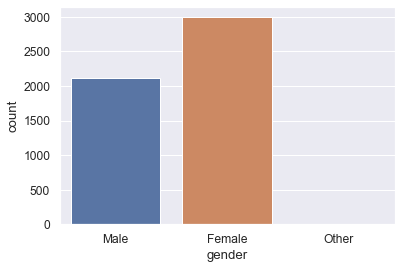

In [4]:
#printing gender properties in ploting respect to count or number of people.
print(df.gender.value_counts())
sns.set_theme(font_scale=1.1,style='darkgrid')
ax = sns.countplot(data=df,x='gender')

Yes    3353
No     1757
Name: ever_married, dtype: int64


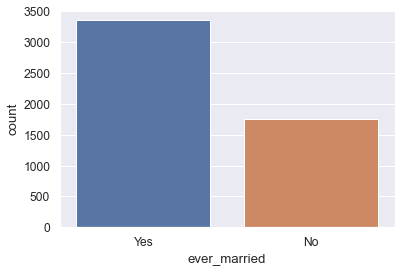

In [5]:
print(df.ever_married.value_counts())
sns.set_theme(font_scale=1.1,style='darkgrid')
ax = sns.countplot(data=df, x='ever_married')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


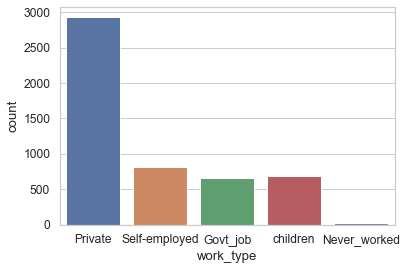

In [6]:
print(df.work_type.value_counts())
sns.set_theme(font_scale=1.1,style='whitegrid')
ax = sns.countplot(data=df,x='work_type')

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


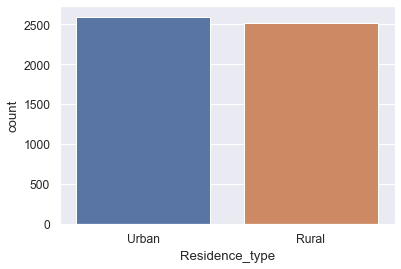

In [7]:
print(df.Residence_type.value_counts())
sns.set_theme(font_scale=1.1,style='darkgrid')
ax = sns.countplot(data=df,x='Residence_type')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


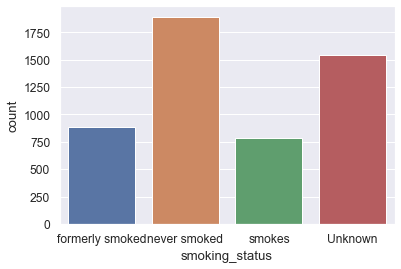

In [8]:
print(df.smoking_status.value_counts())
sns.set_theme(font_scale=1.1,style='darkgrid')
ax = sns.countplot(data=df,x='smoking_status')

0    4861
1     249
Name: stroke, dtype: int64


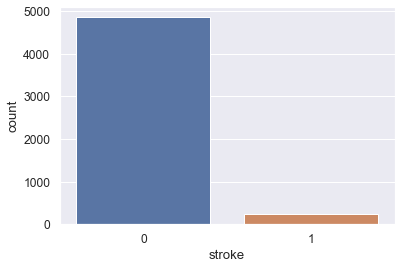

In [9]:
print(df.stroke.value_counts())
sns.set_theme(font_scale=1.1,style='darkgrid')
ax = sns.countplot(data=df,x='stroke')

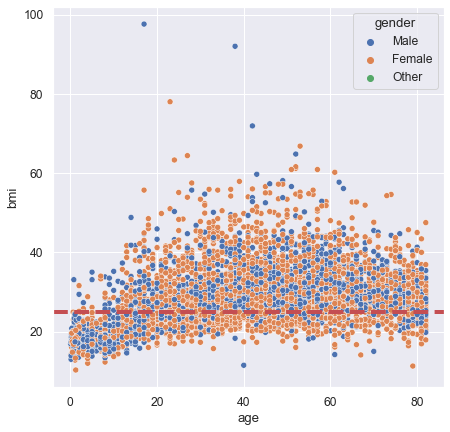

In [10]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

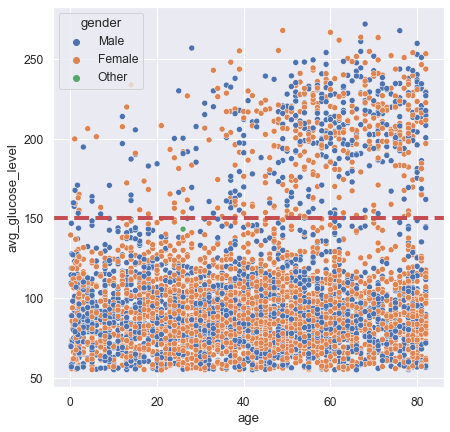

In [11]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

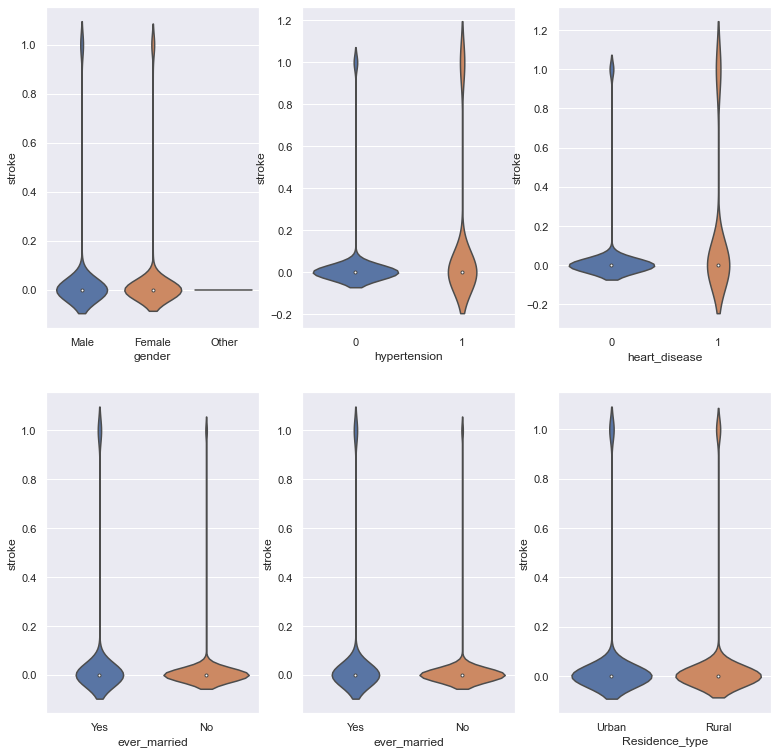

In [12]:
#showing the violin plot with seaborn libriary
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=df)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=df)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=df)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,5)
sns.violinplot(x='ever_married',y='stroke',data=df)
plt.subplot(2,3,6)
sns.violinplot(x='Residence_type',y='stroke',data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


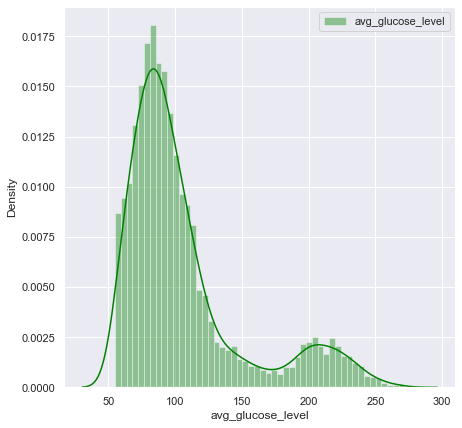

In [13]:

#Distribution Plot
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


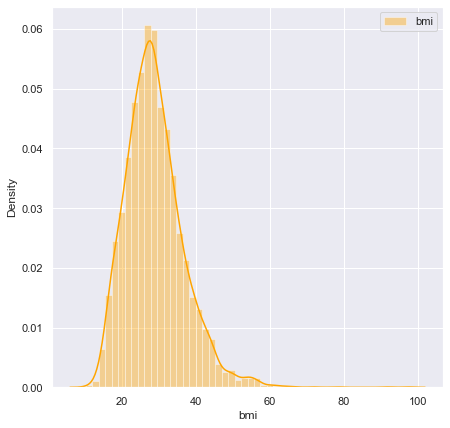

In [14]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='orange',label='bmi',kde=True)
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(10.0, 100.0)

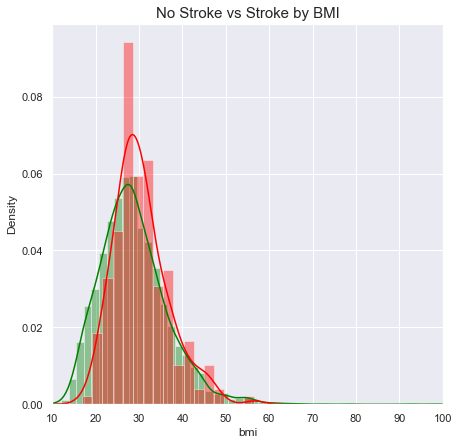

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30.0, 330.0)

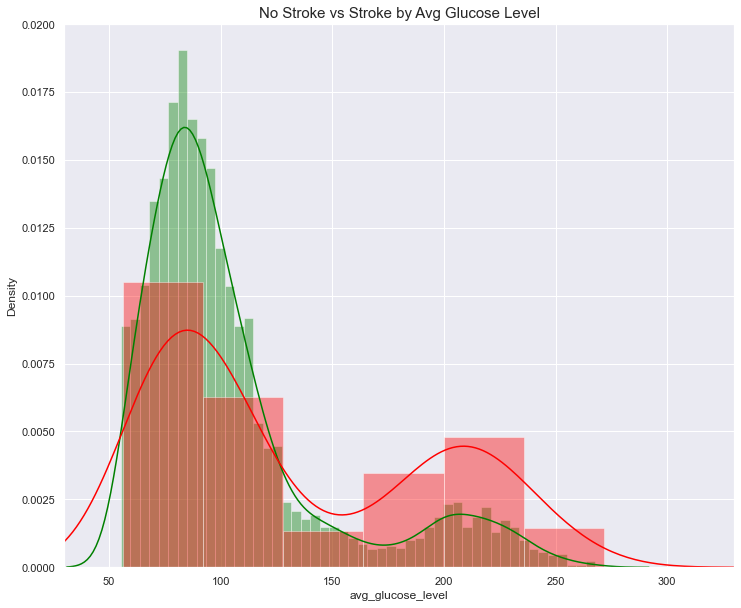

In [16]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(18.0, 100.0)

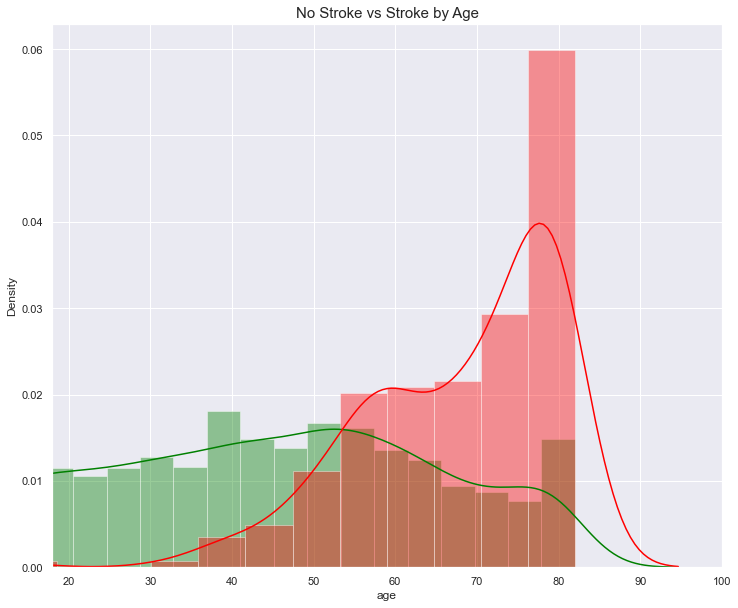

In [17]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['age'],color='green')
sns.distplot(df[df['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

<Figure size 360x360 with 0 Axes>

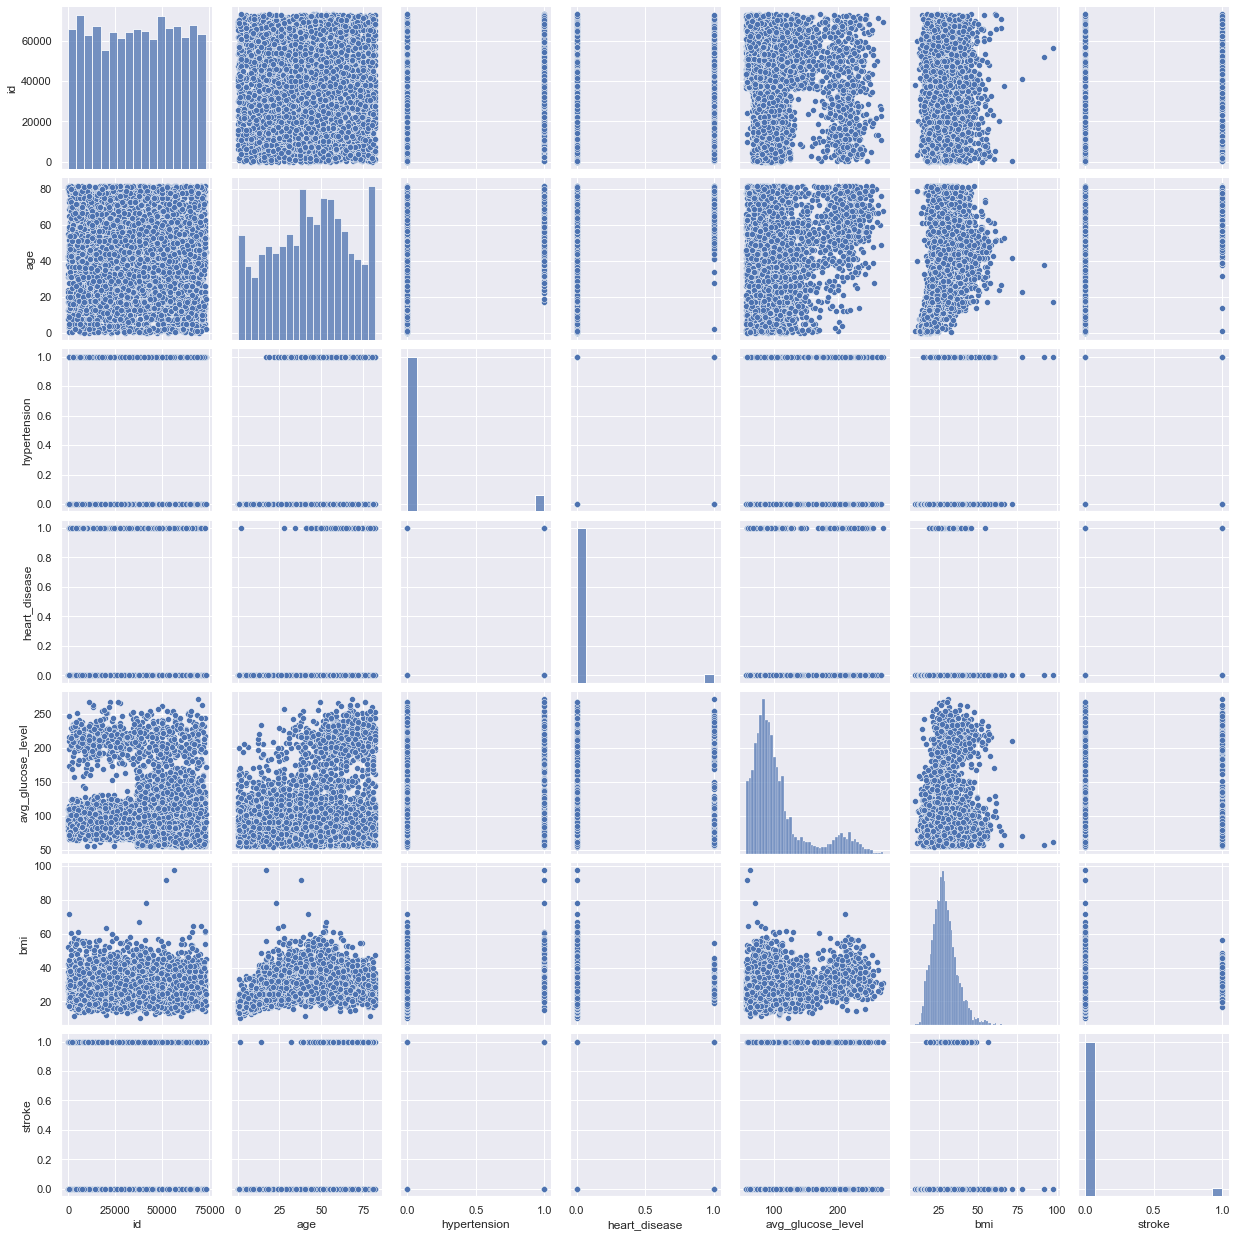

In [18]:

#ploting pair plot using pairplot function.
fig = plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [19]:
#creating lebelencoder object
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [20]:
#identifying total sum of missing values or null values on our dataset.
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [23]:
#printing our dataset attributes
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [24]:

#x and y spliting
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


In [25]:
#using column transformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [26]:
#using train test split function 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 19)
Number transations x_test df (1022, 19)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


In [27]:
print(X_train)

[[  1.     0.     0.   ...   0.    67.29  36.7 ]
 [  1.     0.     0.   ...   0.    83.53  48.5 ]
 [  0.     1.     0.   ...   0.    65.16  30.8 ]
 ...
 [  0.     1.     0.   ...   0.    94.71  28.4 ]
 [  0.     1.     0.   ...   1.   120.94  29.7 ]
 [  1.     0.     0.   ...   0.    59.52  33.2 ]]


# Model Selection

In [28]:
#creating list for models
models = []

models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

# Training and Accuracy of the model

In [29]:
#declearing a list variable
lst_1 = []
#creating for loop variable m, creating function of training by using different models , creating range for total number models,
for m in range(len(models)):
    lst_2 = []
#storing models into model,creating itaration for one time,starts from variable m to 1,or index 0 to 1.    
    model = models[m][1]
#creating functions of training by using different models
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
#creating accuracy object for different models
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)
    
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.18 %

Standard Deviation: 0.11 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[961   7]
 [ 53   1]]
Accuracy Score:  0.9412915851272016

K-Fold Validation Mean Accuracy: 94.67 %

Standard Deviation: 0.45 %

ROC AUC Score: 0.51 %

Precision: 0.12 %

Recall: 0.02 %

F1 Score: 0.03 %
----------------------------------------

GaussianNB :
[[286 682]
 [  2  52]]
Accuracy Score:  0.33072407045009783

K-Fold Validation Mean Accuracy: 32.68 %

Standard Deviation: 3.70 %

ROC AUC Score: 0.63 %

Precision: 0.07 %

Recall: 0.96 %

F1 Score: 0.13 %
----------------------------------------

BernoulliNB :
[[963   5]
 [ 51   3]]
Accuracy Score:  0.9452054794520548

K-Fold Validation Mean Accuracy: 94.59 %

Standard Deviation: 0.32 %

ROC AUC Score: 0.53 %

Precision: 0.38 %

Recall: 0.06 %

F1 Score: 0.10 %
--------

# Comparing all models

In [30]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2


,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
1,SVM,94.716243,95.229997,0.120037,0.500000,0.000000,0.000000,0.000000
0,Logistic Regression,94.716243,95.181037,0.111183,0.500000,0.000000,0.000000,0.000000
6,RandomForest,94.618395,94.985138,0.482329,0.499483,0.000000,0.000000,0.000000
7,AdaBoostClassifier,94.520548,95.156647,0.237859,0.498967,0.000000,0.000000,0.000000
4,BernoulliNB,94.520548,94.594000,0.316722,0.525195,0.375000,0.055556,0.096774
2,KNeigbors,94.129159,94.667410,0.447102,0.505644,0.125000,0.018519,0.032258
5,DecisionTree,90.900196,91.095690,0.660689,0.541054,0.132075,0.129630,0.130841
3,GaussianNB,33.072407,32.681996,3.698681,0.629209,0.070845,0.962963,0.131980


# Visualization of comparing models

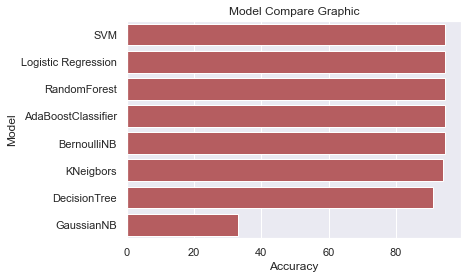

In [31]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='r')
plt.title('Model Compare Graphic');

# Applying Principal Component analysis

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
print(X_train)

[[  1.     0.     0.   ...   0.    67.29  36.7 ]
 [  1.     0.     0.   ...   0.    83.53  48.5 ]
 [  0.     1.     0.   ...   0.    65.16  30.8 ]
 ...
 [  0.     1.     0.   ...   0.    94.71  28.4 ]
 [  0.     1.     0.   ...   1.   120.94  29.7 ]
 [  1.     0.     0.   ...   0.    59.52  33.2 ]]


In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [36]:
#declearing list
lst_1 = []
#fiting into model,using for loop
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)
    
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regression :
[[968   0]
 [ 53   1]]
Accuracy Score:  0.9481409001956947

K-Fold Validation Mean Accuracy: 95.18 %

Standard Deviation: 0.11 %

ROC AUC Score: 0.51 %

Precision: 1.00 %

Recall: 0.02 %

F1 Score: 0.04 %
----------------------------------------



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[966   2]
 [ 53   1]]
Accuracy Score:  0.9461839530332681

K-Fold Validation Mean Accuracy: 94.91 %

Standard Deviation: 0.34 %

ROC AUC Score: 0.51 %

Precision: 0.33 %

Recall: 0.02 %

F1 Score: 0.04 %
----------------------------------------

GaussianNB :
[[875  93]
 [ 35  19]]
Accuracy Score:  0.8747553816046967

K-Fold Validation Mean Accuracy: 87.30 %

Standard Deviation: 1.09 %

ROC AUC Score: 0.63 %

Precision: 0.17 %

Recall: 0.35 %

F1 Score: 0.23 %
----------------------------------------

BernoulliNB :
[[960   8]
 [ 53   1]]
Accuracy Score:  0.9403131115459883

K-Fold Validation Mean Accuracy: 95.21 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.51 %

Precision: 0.11 %

Recall: 0.02 %

F1 Score: 0.03 %
---------

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [38]:
#declearing list
lst_1 = []
#fiting into model,using for loop
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)
    
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[966   2]
 [ 54   0]]
Accuracy Score:  0.9452054794520548

K-Fold Validation Mean Accuracy: 94.99 %

Standard Deviation: 0.25 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

GaussianNB :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

BernoulliNB :
[[968   0]
 [ 54   0]]
Accuracy Score:  0.9471624266144814

K-Fold Validation Mean Accuracy: 95.23 %

Standard Deviation: 0.12 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
---------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree :
[[933  35]
 [ 46   8]]
Accuracy Score:  0.9207436399217221

K-Fold Validation Mean Accuracy: 90.75 %

Standard Deviation: 1.17 %

ROC AUC Score: 0.56 %

Precision: 0.19 %

Recall: 0.15 %

F1 Score: 0.16 %
----------------------------------------

RandomForest :
[[964   4]
 [ 53   1]]
Accuracy Score:  0.9442270058708415

K-Fold Validation Mean Accuracy: 94.62 %

Standard Deviation: 0.38 %

ROC AUC Score: 0.51 %

Precision: 0.20 %

Recall: 0.02 %

F1 Score: 0.03 %
----------------------------------------

AdaBoostClassifier :
[[966   2]
 [ 53   1]]
Accuracy Score:  0.9461839530332681

K-Fold Validation Mean Accuracy: 95.13 %

Standard Deviation: 0.23 %

ROC AUC Score: 0.51 %

Precision: 0.33 %

Recall: 0.02 %

F1 Score: 0.04 %
----------------------------------------



# confusion matrix


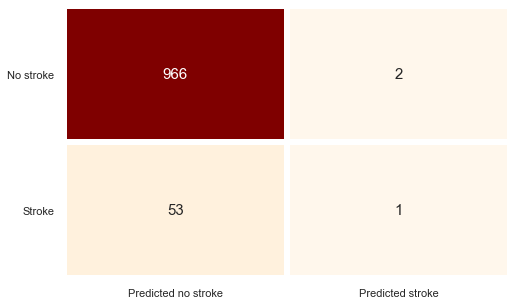

In [39]:
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'OrRd', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()